In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stores.csv to stores.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
feature_store = features.merge(stores, how='inner', on="Store")
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
feature_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [ ]:
#  to_datetime() method helps to convert string Date time into Date time object.
feature_store['Date'] = pd.to_datetime(feature_store['Date'])
feature_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
# converting train and test date object type to datetime type
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Adding useful feature into feature store
feature_store['Day'] = feature_store['Date'].dt.day
feature_store['Week'] = feature_store['Date'].dt.week
feature_store['Month'] = feature_store['Date'].dt.month
feature_store['Year'] = feature_store['Date'].dt.year
feature_store.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Day,Week,Month,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,5,2,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,12,6,2,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,19,7,2,2010


##### **Merging feature_store to train and test**

In [ ]:
train_df = train.merge(feature_store, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
train_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,12,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,19,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,26,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010


In [ ]:
test_df = test.merge(feature_store, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)


In [ ]:
train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Day,Week,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,15.673131,25.826762,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,8.753549,14.151887,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,8.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,16.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,23.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,31.000000,52.000000,12.000000,2012.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

### **EDA**

In [ ]:
df_weeks = train_df.groupby('Week').sum()

In [ ]:
px.line(data_frame=df_weeks, x = df_weeks.index, y='Weekly_Sales', labels={'Weekly_Sales':'Weekly Sales', 'x':'Weeks'}, title='Sales over weeks')

# Below we can see distribution of weekly sales distribution

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_weeks.index, y = df_weeks['MarkDown1'], name='MarkDown1', mode='lines'))
fig1.add_trace(go.Scatter(x=df_weeks.index, y=df_weeks['Weekly_Sales'], name='Weekly Sales', mode='lines'))
fig1.update_layout(title= 'Sales vs Markdown1', xaxis_title='Weeks')

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_weeks.index, y = df_weeks['MarkDown2'], name='MarkDown2', mode='lines'))
fig1.add_trace(go.Scatter(x=df_weeks.index, y=df_weeks['Weekly_Sales'], name='Weekly Sales', mode='lines'))
fig1.update_layout(title= 'Sales vs Markdown2', xaxis_title='Weeks')

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_weeks.index, y = df_weeks['MarkDown3'], name='MarkDown3', mode='lines'))
fig1.add_trace(go.Scatter(x=df_weeks.index, y=df_weeks['Weekly_Sales'], name='Weekly Sales', mode='lines'))
fig1.update_layout(title= 'Sales vs Markdown3', xaxis_title='Weeks')

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_weeks.index, y = df_weeks['MarkDown4'], name='MarkDown4', mode='lines'))
fig1.add_trace(go.Scatter(x=df_weeks.index, y=df_weeks['Weekly_Sales'], name='Weekly Sales', mode='lines'))
fig1.update_layout(title= 'Sales vs Markdown4', xaxis_title='Weeks')

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_weeks.index, y = df_weeks['MarkDown5'], name='MarkDown5', mode='lines'))
fig1.add_trace(go.Scatter(x=df_weeks.index, y=df_weeks['Weekly_Sales'], name='Weekly Sales', mode='lines'))
fig1.update_layout(title= 'Sales vs Markdown5', xaxis_title='Weeks')

#### **We can see with the above graphs how markdown and sales are related**

#### **Checking the relationship of other features with weekly sales**

In [ ]:
# Converting temperature to celcius for better understandings

train_df['Temperature'] = train_df['Temperature'].apply(lambda x: (x-32)/1.8)
test_df['Temperature'] = test_df['Temperature'].apply(lambda x: (x-32)/1.8)

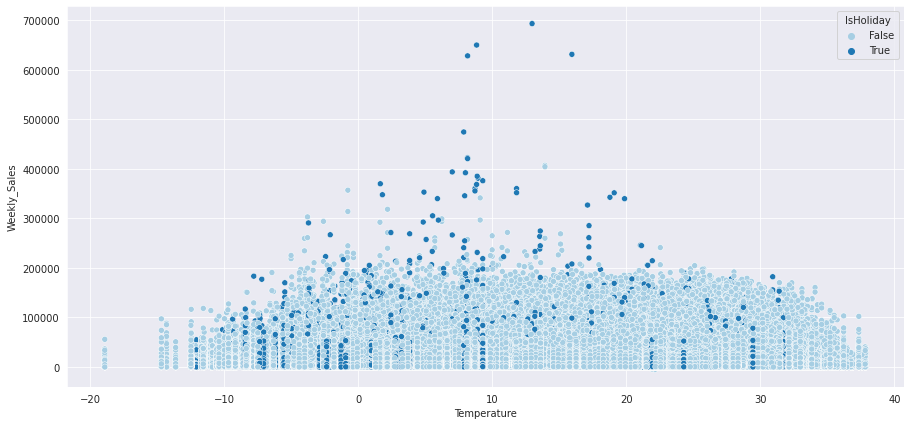

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=train_df, x = 'Temperature', y='Weekly_Sales', hue='IsHoliday')


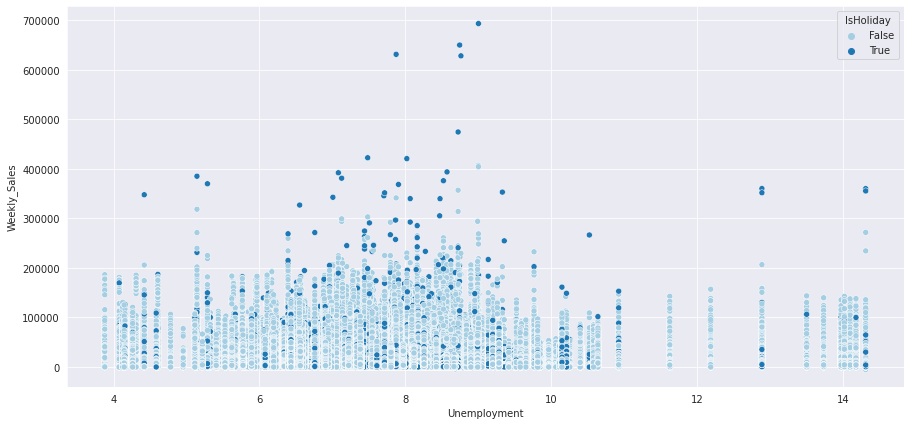

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.scatterplot(data=train_df, x = 'Unemployment', y='Weekly_Sales', hue='IsHoliday')

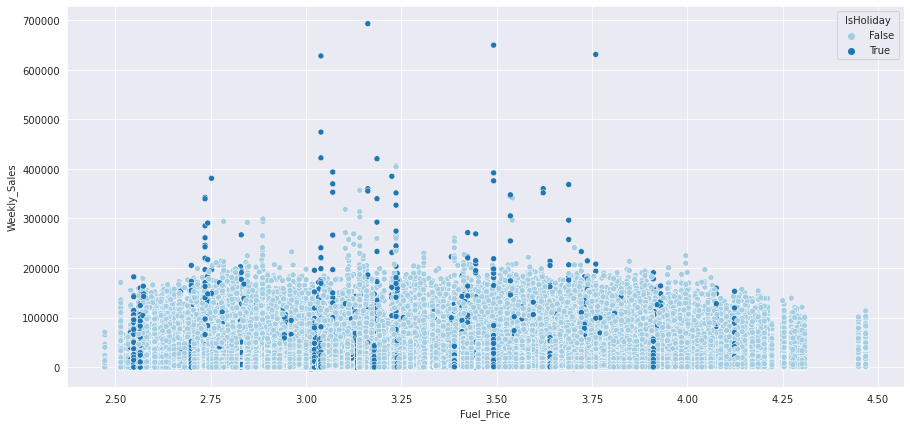

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.scatterplot(data=train_df, x = 'Fuel_Price', y='Weekly_Sales', hue='IsHoliday')

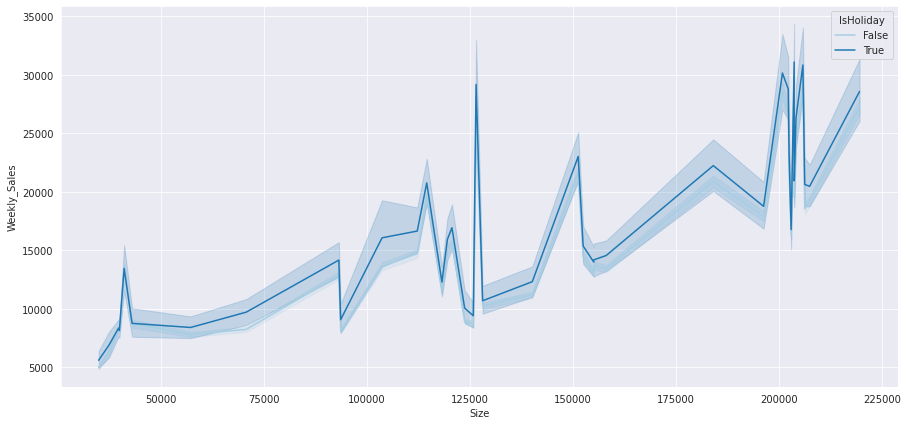

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.lineplot(data=train_df, x = 'Size', y='Weekly_Sales', hue='IsHoliday')

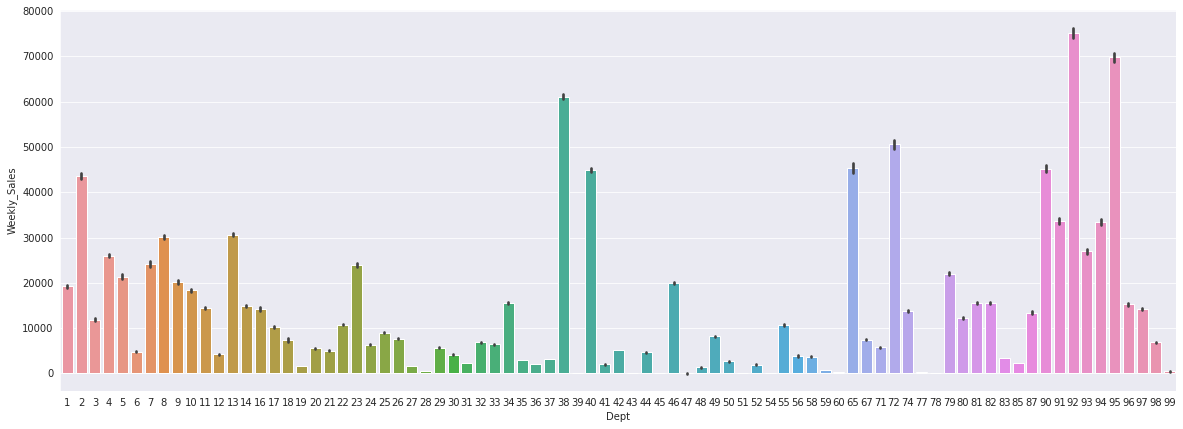

In [ ]:
plt.figure(figsize=(20,7))
sns.set_style('darkgrid')

sns.barplot(data=train_df, x = 'Dept', y = 'Weekly_Sales')

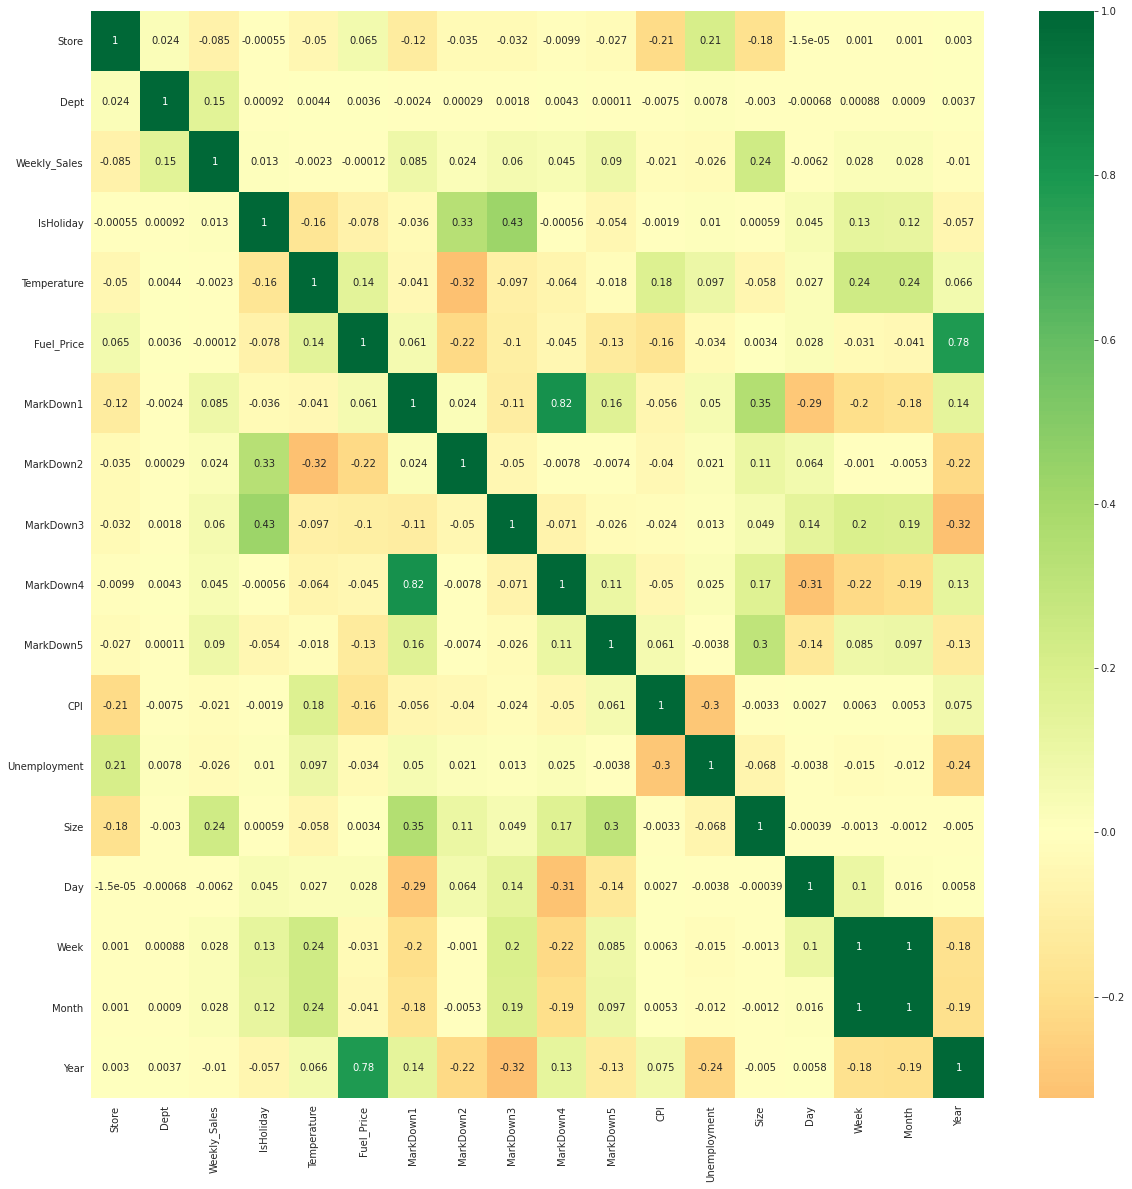

In [ ]:
plt.figure(figsize=(20,20))
corr = train_df.corr()
sns.heatmap(corr, cmap='RdYlGn', center=0, annot=True)

In [ ]:
weekly_sales_corr = train_df.corr().iloc[2,:]

In [ ]:
corr_df = pd.DataFrame(data=weekly_sales_corr, index=weekly_sales_corr.index).sort_values(by='Weekly_Sales', ascending=False)
corr_df

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.243828
Dept,0.148032
MarkDown5,0.090362
MarkDown1,0.085251
MarkDown3,0.060385
MarkDown4,0.045414
Month,0.028409
Week,0.027673
MarkDown2,0.024130


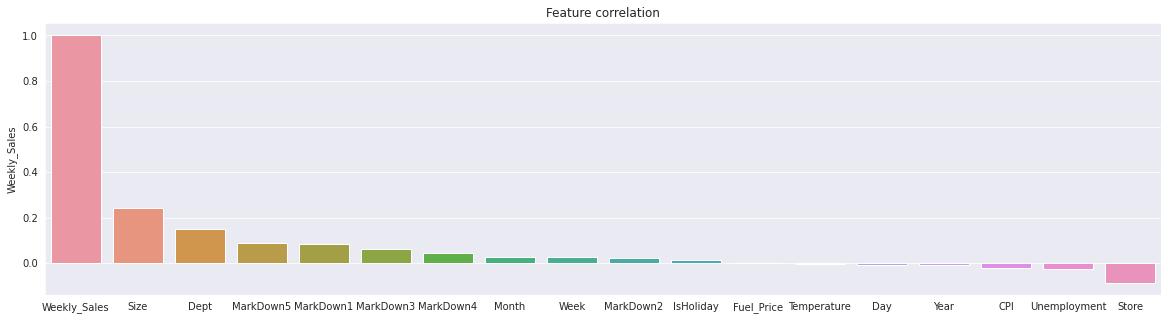

In [ ]:
# Plotting bar for feature correlation
plt.figure(figsize=(20,5))
plt.title('Feature correlation')
sns.barplot(data=corr_df, x=corr_df.index, y='Weekly_Sales')

#### **Fill Missing Values**

In [ ]:
data_train = train_df.copy()
data_test = test_df.copy()

In [ ]:
data_train.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Day                  0
Week                 0
Month                0
Year                 0
dtype: int64

In [ ]:
data_train.fillna(0, inplace = True)

In [ ]:
data_test.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [ ]:
data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace=True)

In [ ]:
data_test.fillna(0, inplace=True)

**Encoding Categorical variable**

In [ ]:
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [ ]:
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else(2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else(2 if x == 'B' else 3))

**Feature Selection**

In [ ]:
X_f = data_train.drop(['Date', 'Weekly_Sales'], axis='columns')
Y_f = data_train['Weekly_Sales']

In [ ]:
rf_features = RandomForestRegressor()

In [ ]:
rf_features.fit(X_f, Y_f)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
importance_df = pd.DataFrame({'feature':X_f.columns, 'importance':rf_features.feature_importances_}).sort_values('importance', ascending = False)

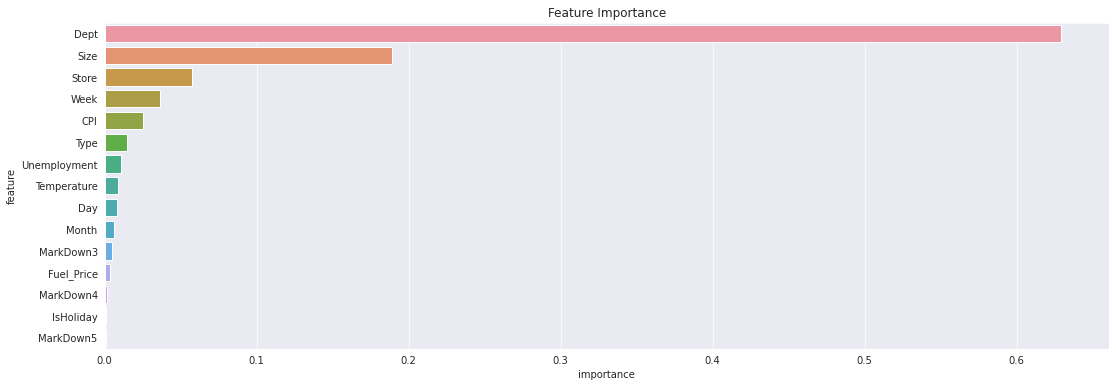

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature')

In [ ]:
# To establish the baseline, I am going to train the model with some original features.

X = data_train[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
Y = data_train['Weekly_Sales']

**Splitting and Training**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
preds_train = RF.predict(X_train)

In [ ]:
preds_test = RF.predict(X_test)

**Evaluation**

In [ ]:
metrics.mean_squared_error(Y_train, preds_train, squared=False)

1305.1503831502318

In [ ]:
metrics.mean_squared_error(Y_test, preds_test, squared=False)

3237.491511258282

**Predictions**

In [ ]:
test = data_test[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
predict = RF.predict(test)


In [ ]:
predict

array([32399.5628, 19176.6215, 19495.6733, ...,   721.4925,   785.8143,
         693.667 ])

In [ ]:
sample_submission['Weekly_Sales'] = predict
sample_submission.to_csv('submission.csv', index = False)